In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

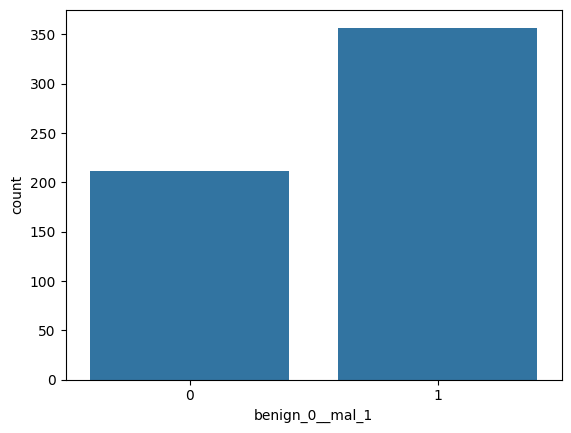

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

<Axes: >

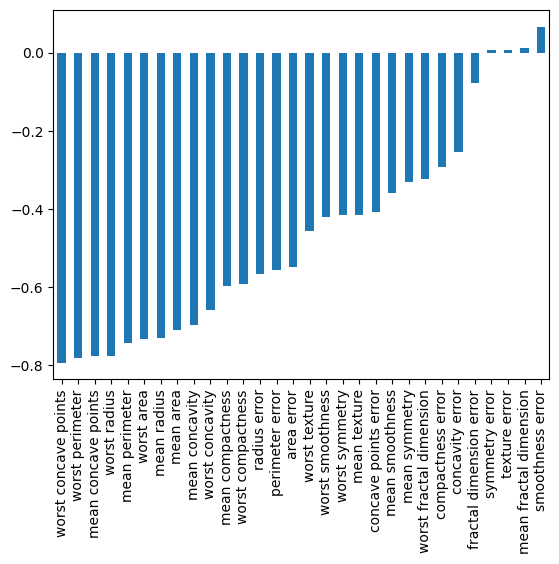

In [7]:
df.corr()['benign_0__mal_1'].sort_values()[:-1].plot(kind='bar')

<Axes: >

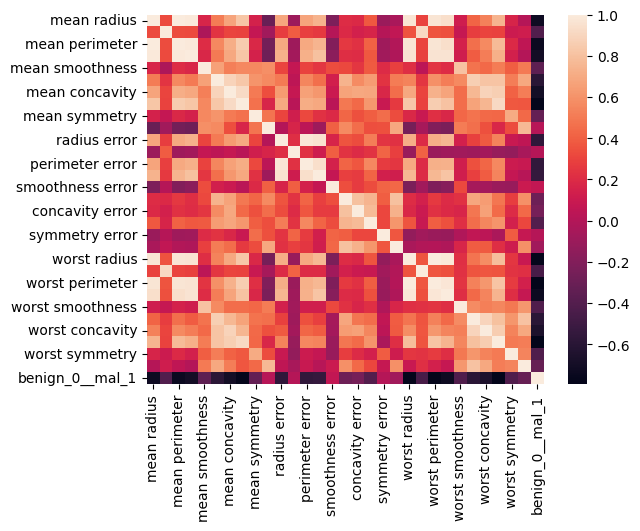

In [8]:
sns.heatmap(df.corr())

In [9]:
x = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaled = MinMaxScaler()

In [14]:
x_train = scaled.fit_transform(x_train)
x_test = scaled.transform(x_test)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [16]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

# Because it is a binary classification problem so we want probabilities of the classes hence sigmoid.
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [17]:
model.fit(x=x_train,y=y_train,epochs=600,validation_data = (x_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 0.6507 - val_loss: 0.6270
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6070 - val_loss: 0.5795
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5644 - val_loss: 0.5358
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5215 - val_loss: 0.4927
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4794 - val_loss: 0.4504
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4408 - val_loss: 0.4074
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4005 - val_loss: 0.3676
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3657 - val_loss: 0.3326
Epoch 9/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3374 - val_loss: 0.3043
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3080 - val_loss: 0.2753
Epoch 11

In [18]:
losses = pd.DataFrame(model.history.history)

In [19]:
losses

,loss,val_loss
0,0.650731,0.627022
1,0.606970,0.579463
2,0.564449,0.535760
3,0.521451,0.492666
4,0.479447,0.450398
...,...,...
595,0.004909,0.177118
596,0.004852,0.189081
597,0.004765,0.180538
598,0.004941,0.189412


<Axes: >

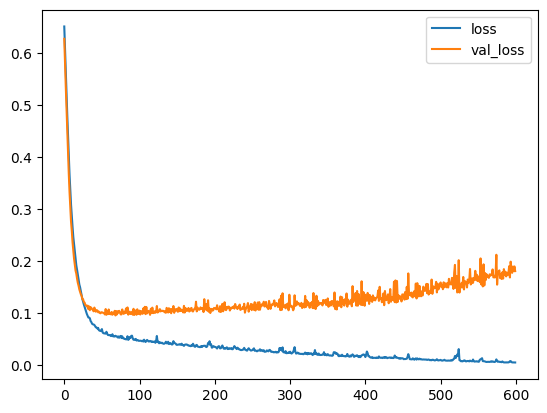

In [20]:
losses.plot() #Validation loss started increasing we have overfitted the model.

### Stopping Overfitting and Early stoppers.

In [22]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

# Because it is a binary classification problem so we want probabilities of the classes hence sigmoid.
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.src.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quanti

In [25]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25) #we want to monitor val_loss for minimum value.
#Patience =25 means we will wait for 25 epochs more even after we have detected a stopping point for taking care of noise.

In [26]:
model.fit(x=x_train,y=y_train,epochs=600,validation_data = (x_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 31ms/step - loss: 0.6891 - val_loss: 0.6764
Epoch 2/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6534 - val_loss: 0.6435
Epoch 3/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6228 - val_loss: 0.6140
Epoch 4/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5909 - val_loss: 0.5810
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5541 - val_loss: 0.5420
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5136 - val_loss: 0.4973
Epoch 7/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4682 - val_loss: 0.4500
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4217 - val_loss: 0.4041
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3793 - val_loss: 0.3587
Epoch 10/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3373 - val_loss: 0.3233
Epoch 1

In [27]:
### Early stoppin worked at 600 epochs was too much for this.

In [28]:
model_loss = pd.DataFrame(model.history.history)

In [29]:
model_loss

,loss,val_loss
0,0.689077,0.676415
1,0.653361,0.643514
2,0.622763,0.614034
3,0.590920,0.581009
4,0.554071,0.541985
...,...,...
104,0.045245,0.129100
105,0.047537,0.126077
106,0.046608,0.118259
107,0.048767,0.129136


<Axes: >

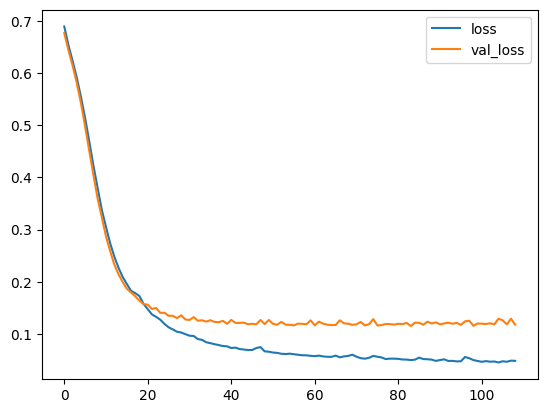

In [30]:
model_loss.plot()

### Preventing Overfitting with dropout layers.

In [32]:
from tensorflow.keras.layers import Dropout

In [33]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5)) # 50% Neurons will be not be affected, randomly for every batch.

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

# Because it is a binary classification problem so we want probabilities of the classes hence sigmoid.
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [34]:
model.fit(x=x_train,y=y_train,epochs=600,validation_data = (x_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 31ms/step - loss: 0.7185 - val_loss: 0.6625
Epoch 2/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6628 - val_loss: 0.6315
Epoch 3/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6445 - val_loss: 0.6050
Epoch 4/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6320 - val_loss: 0.5791
Epoch 5/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6226 - val_loss: 0.5520
Epoch 6/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5860 - val_loss: 0.5259
Epoch 7/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5851 - val_loss: 0.4986
Epoch 8/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5357 - val_loss: 0.4694
Epoch 9/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5197 - val_loss: 0.4419
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5323 - val_loss: 0.4182
Epoch

In [35]:
m_loss = pd.DataFrame(model.history.history)

<Axes: >

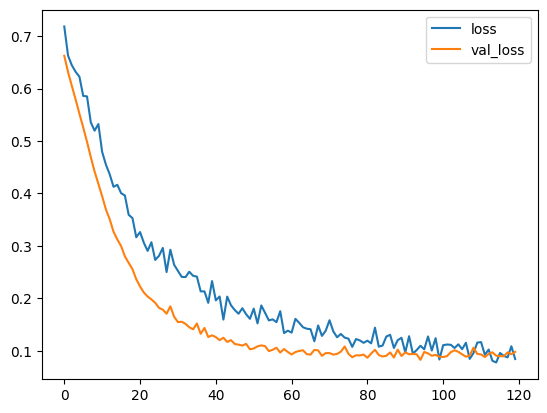

In [36]:
m_loss.plot()

In [95]:
predictions=(model.predict(x_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 3ms/step


In [97]:
from sklearn.metrics import confusion_matrix,classification_report

In [99]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

[[54  1]
 [ 5 83]]
